**Problem statement- Lending-Club Case study**
this case study is relatd to the finance company which specialises in lending various types of loans to urban customers. 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 
   

*   If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company 
*   If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

###Data Understanding Phase

In [332]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
#Ignore warning due to version problems
import warnings
warnings.filterwarnings('ignore')

In [334]:
#load the data(loan.csv) file and dictionary(Data_Dictionary.xlsx) and check dictionaory file attributes before proceeding further
data= pd.read_csv("/content/loan.csv")
dfs = pd.read_excel("/content/Data_Dictionary.xlsx")
dfs.head()


In [335]:
#display the starting 5 rows of loan file
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [336]:
#check shape & datatype of loan data

print(data.shape)
print(data.info())
print(data.dtypes)


(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [337]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

###Data cleaning Phase

In [338]:
# Lets find Which columns have all null values

data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [339]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [340]:
#find column which have missing value greater than 60%
find_missing_values = list(null_perc[null_perc >= 60].index)

len(find_missing_values)

57

In [341]:
#There are 57 column which have more 60% values are null
# drop those column because it does not help in analysis

data.drop(null_perc[ null_perc > 60 ].index, axis=1, inplace=True)

In [342]:
data.shape

(39717, 54)

In [343]:
missing = round(100*(data.isnull().sum()/len(data.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [344]:
# Remove the desc column(no use in data analysis)

data = data.drop('desc',axis=1)

In [345]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [346]:
#Remove the column which has one unique value.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)


In [347]:
# Find the shape
data.shape

(39717, 44)

In [348]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)


id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

In [349]:
# Remove member id and url have(all unique id and no use for analysis)
data.drop(['member_id', 'url'], axis=1, inplace=True)

In [350]:
#Remove the emp_title, title column
data.drop(['emp_title', 'title'], axis=1, inplace=True)

In [351]:
data.shape

(39717, 40)

In [352]:
# we are interested in only loan application detail so remove unecessary cloumn  
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [353]:
#Again check shape
data.shape

(39717, 31)

In [354]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [355]:
# Only charged off and fully paid value is required so removed current loan status rows
data = data[data.loan_status != 'Current']

In [356]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [357]:
#There is empty space at the start of values. Let's remove it.
#Stripping empty space in values in term

data['term'] = data.term.str.strip()
data.term.unique()
#The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.removing the months string from within the column term.
data['term'] = data.term.apply(lambda x: x.split()[0])

data.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [358]:
data.shape

(38577, 31)

In [359]:
#Emp_length is in year so remove the <1 to 0 and 10+ to 10 so the range is from 0 to 10.
data.emp_length.fillna('0',inplace=True)
data['emp_length']=data.emp_length.str.extract('(\d+)')
print(data['emp_length'].value_counts())

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64


In [360]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


In [361]:
#issue_d, earliest_cr_line are having date values, let convert column data type to date.
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')

In [362]:
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [363]:
# Converted to proper datatypes for analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [364]:
data.groupby('earliest_cr_line').loan_amnt.count()

earliest_cr_line
1946-01-01    1
1950-12-01    1
1954-10-01    1
1954-11-01    1
1956-09-01    1
             ..
2008-07-01    7
2008-08-01    8
2008-09-01    8
2008-10-01    1
2008-11-01    1
Name: loan_amnt, Length: 524, dtype: int64

In [365]:
#Derived Variables
#Let's create new columns from date type columns

#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [366]:
#Creating Approved Loan amount ratio which is a ratio of Funded Amount by 
#investor to Requested Loan amount.

data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0,2011,Dec,3,1985,Jan,99.5
1,1077430,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0,2011,Dec,3,1999,Apr,100.0
2,1077175,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0,2011,Dec,3,2001,Nov,100.0
3,1076863,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0,2011,Dec,3,1996,Feb,100.0
5,1075269,5000,5000,5000.0,36,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0,2011,Dec,3,2004,Nov,100.0


###Univariate Analysis
for univariate analysis used the seaborn library.

In [367]:
#Loan Amount
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

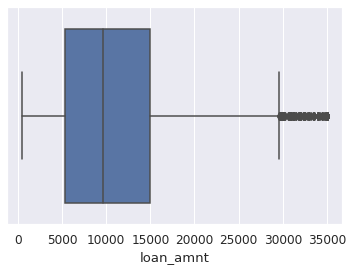

In [368]:
sns.boxplot(data.loan_amnt)

In [369]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

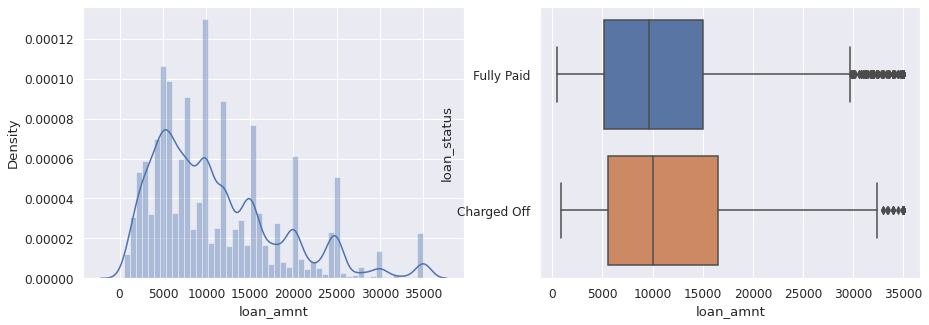

In [370]:
plot_distribution(data, 'loan_amnt')

In [371]:
#Status of laon amount
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value).Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.Charged off loans are shifted towards higher average loan amount request.

###funded_amnt
The total amount committed to that loan at that point in time

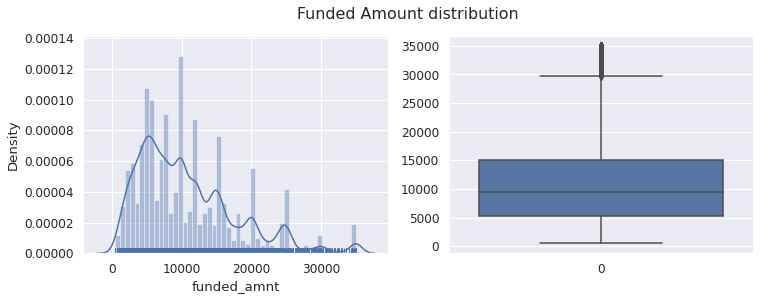

In [372]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [373]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
5%        2400.000000
10%       3000.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Observation:
Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

###funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

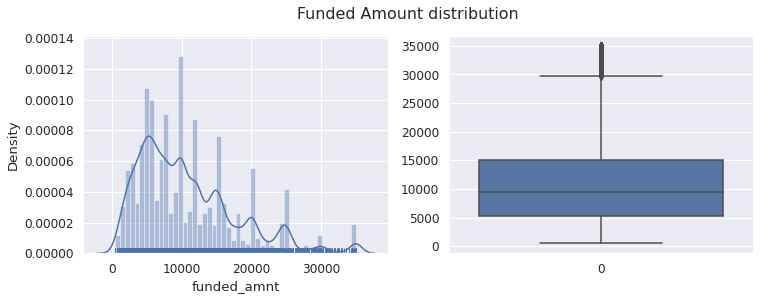

In [374]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [375]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
5%        1800.000000
10%       2825.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
90%      19975.000000
95%      24500.066590
99%      34715.012285
max      35000.000000
Name: funded_amnt_inv, dtype: float64

**Observations:**  
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

### Approved Loan Amount Ratio

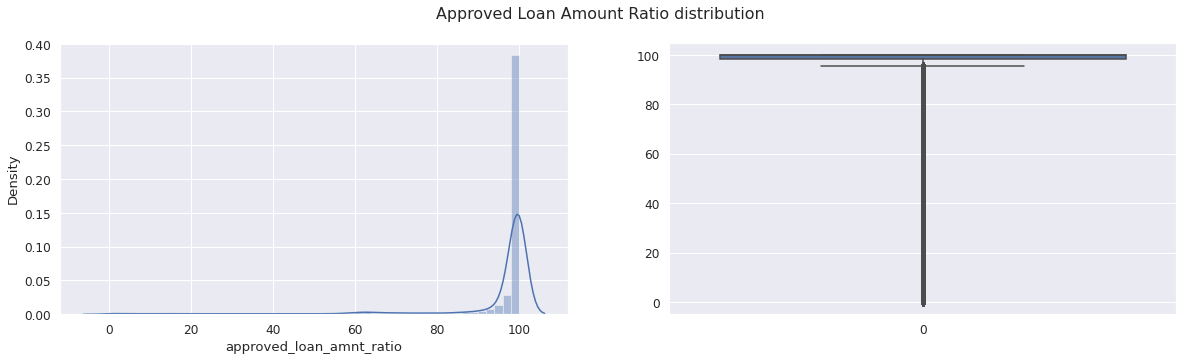

In [376]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations**:
70% of Borrowers got 100% loan amount from investors.

### Installment
The monthly payment owed by the borrower if the loan originates.

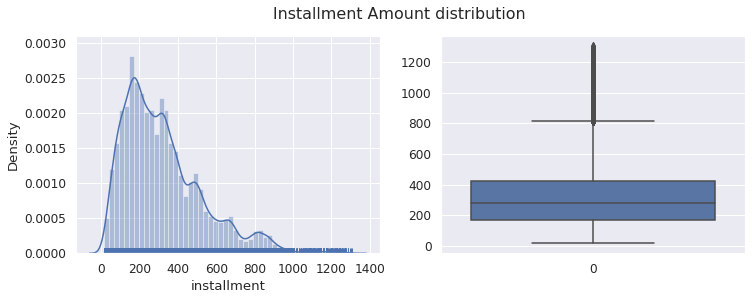

In [377]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The Most representative value of Installment amount in around 280.

# annual_inc
The self-reported annual income provided by the borrower during registration.

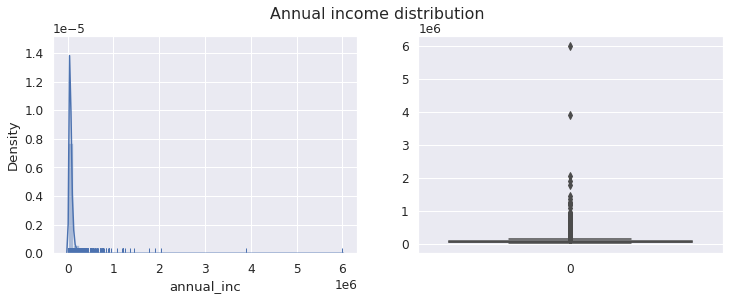

In [378]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

Its clearly shows that there is some outlier is present now treat the outlier

In [379]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(data['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

data = data[data["annual_inc"] < data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(data["annual_inc"].describe())

Before Removal of Outliers :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


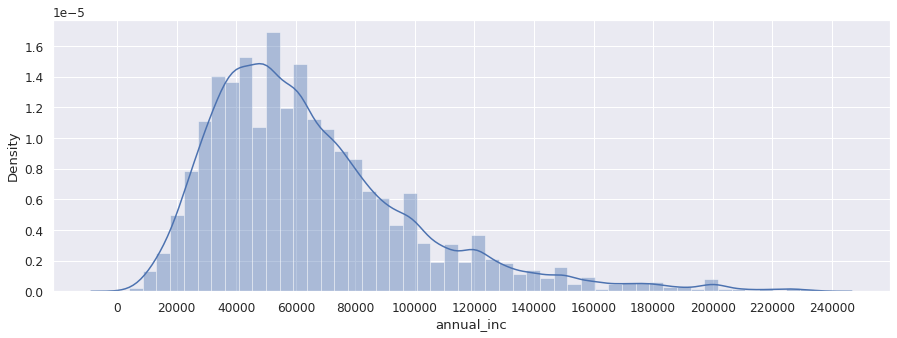

In [380]:
plt.figure(figsize=(15, 5))
sns.distplot(data['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

##Observation:

10000 seems to be a good bin size to further analyze income as categories

# dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

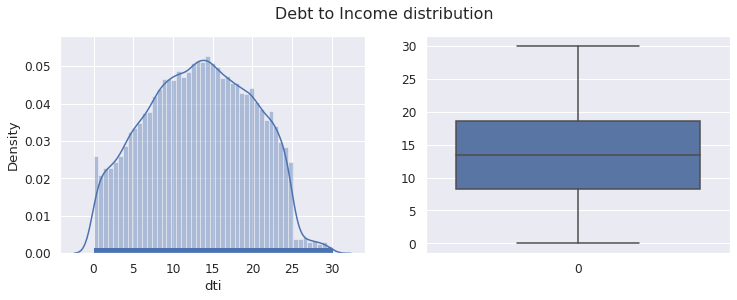

In [381]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

**Observations**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

### Pub rec
Number of Public derogatory records

Text(0.5, 1.0, 'pub_rec Distribution')

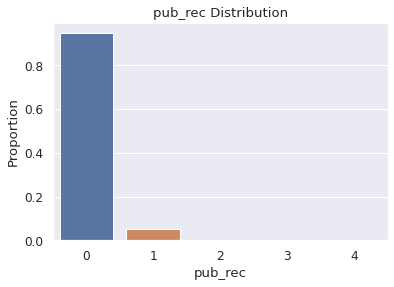

In [382]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Observations**:
Around 90% borrower's are having no public derogatory records.

# pub_rec_bankruptcies
Number of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

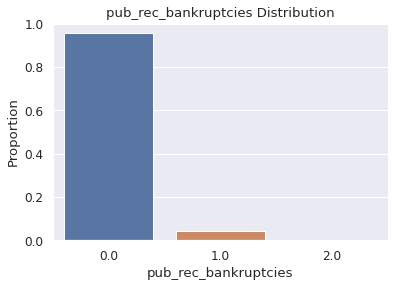

In [383]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Observations**:<br>
99% people have not went bankrupt.

### Loan issue date (issue_d)

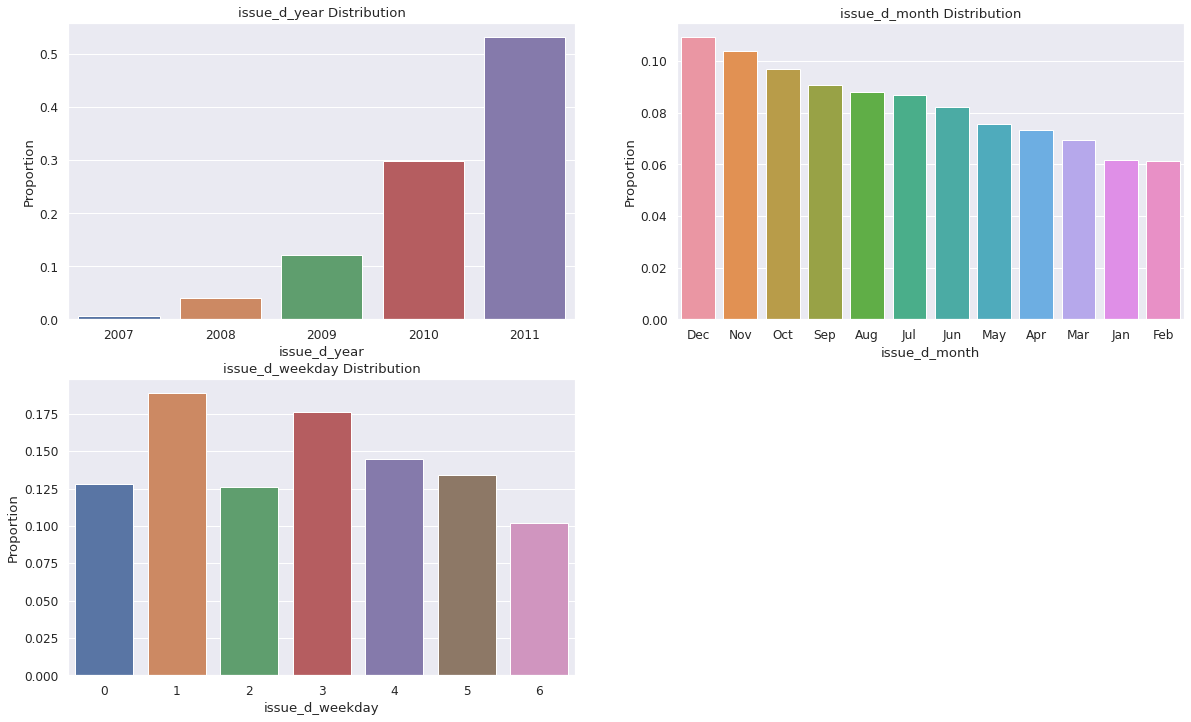

In [384]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

**Observations**:<br>
The lending club(LC) has doubling loan issues every year. <br>
year and month does not give more effect on the likelihood of default.<br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

###Earliest_cr_line

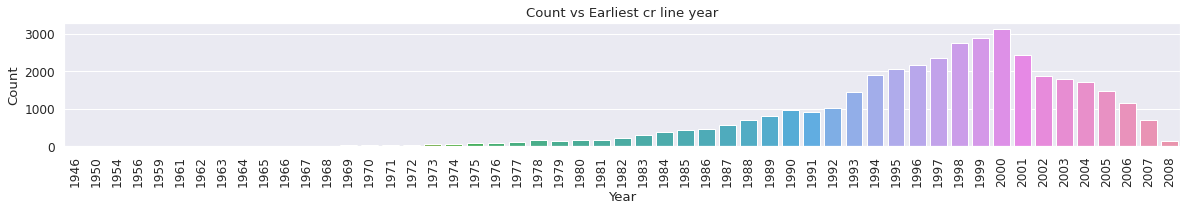

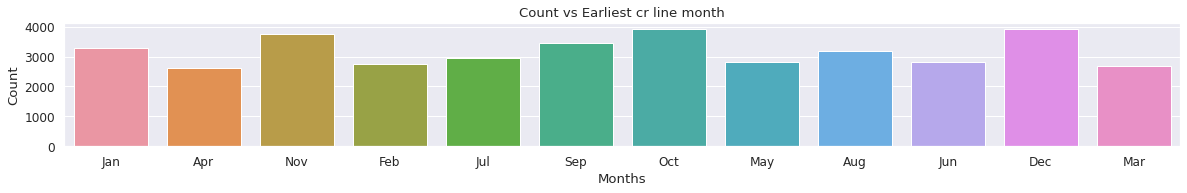

In [385]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Observations**:  
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Term

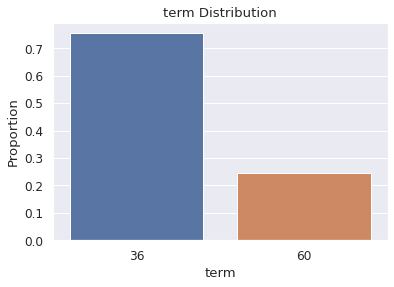

In [386]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Barrowrs have taken 36 months tenure more than 60 months.


### Grade

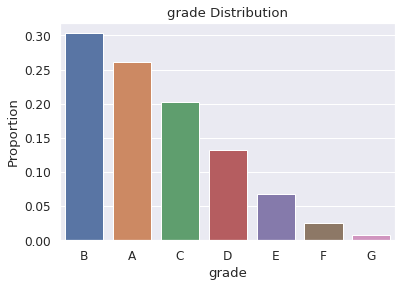

In [387]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**: <br>
Most borrowers fall under A and B grades then other grades

###  Sub Grade

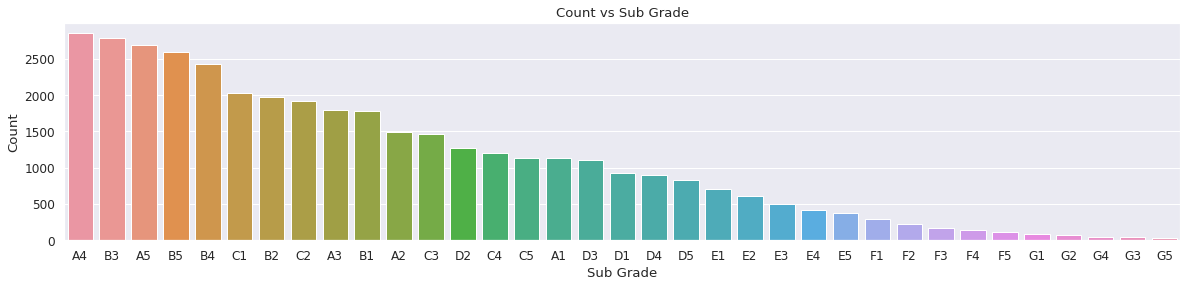

In [388]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length

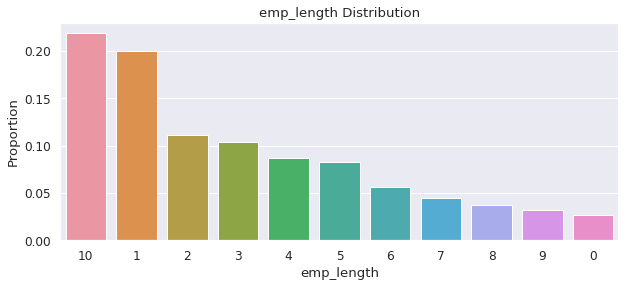

In [389]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Borrowers are mostly 10+ years emploment length.

### Home Ownership

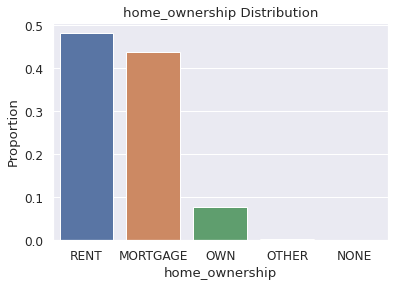

In [390]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

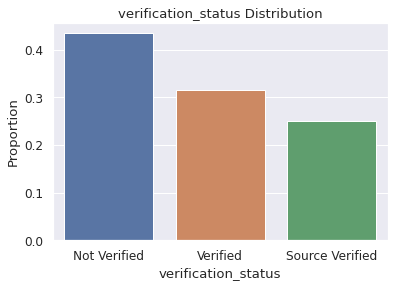

In [391]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Majority of loans were given without verification of applicants income.

### Loan Status

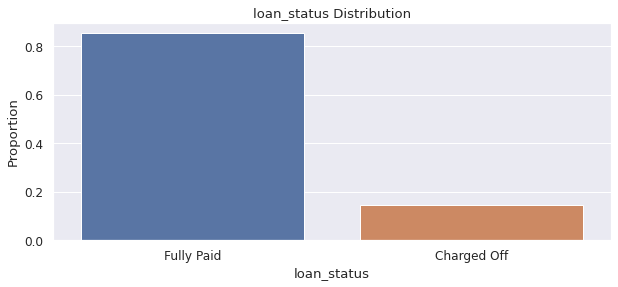

In [392]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

### Purpose

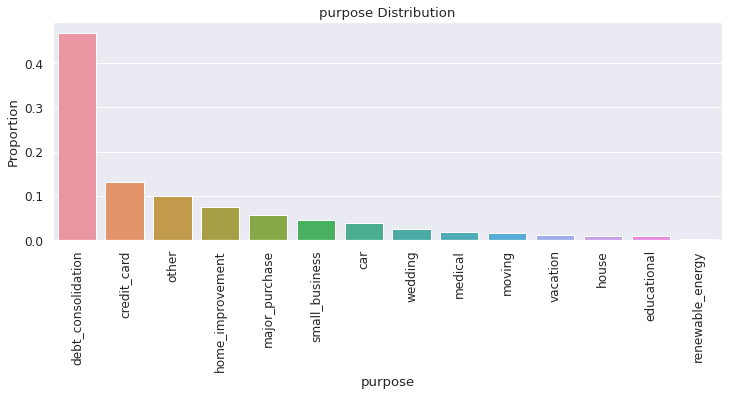

In [393]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_

#Segmented Univariate Analysis

Loan amount

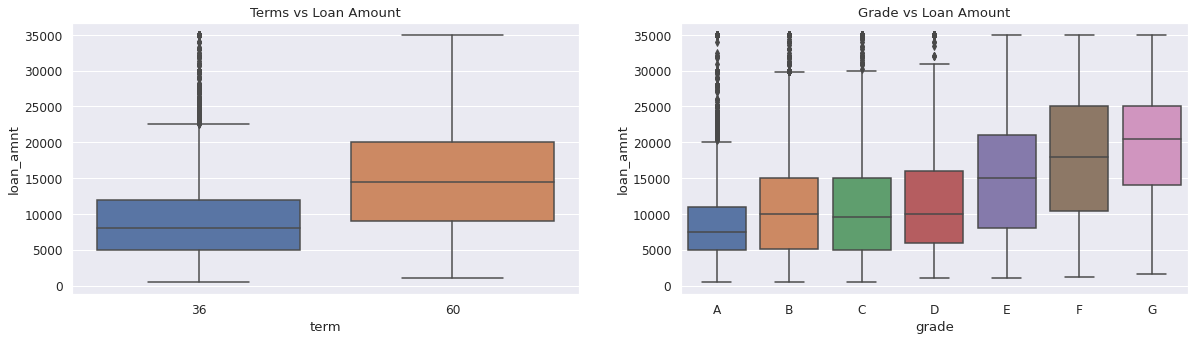

In [394]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

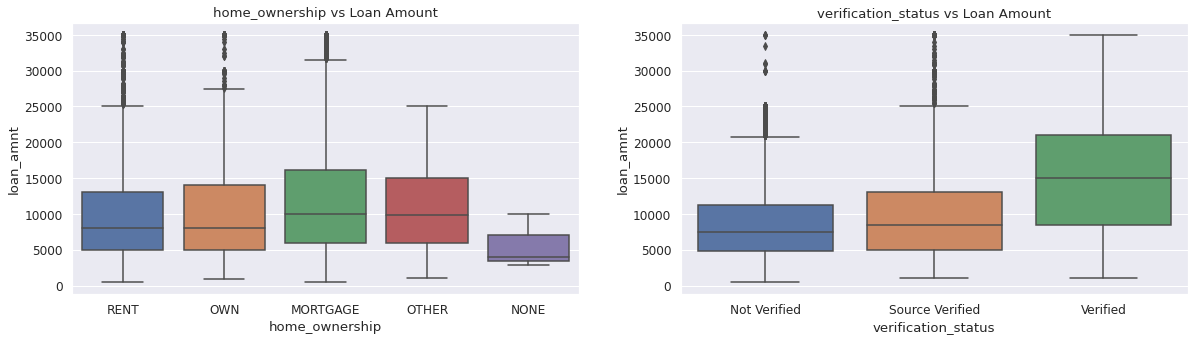

In [395]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

**Observations**:<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

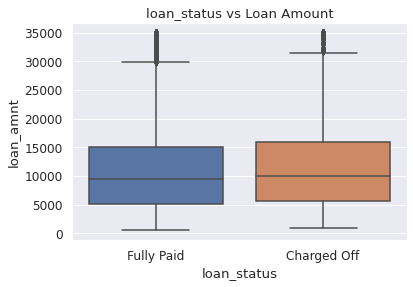

In [396]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

**Observations**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

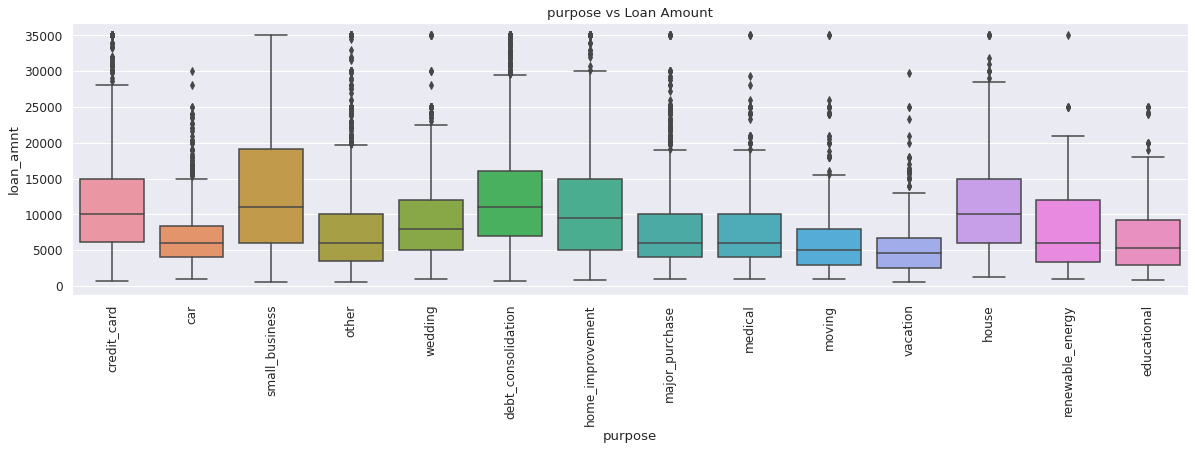

In [397]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

**Observations**:  
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

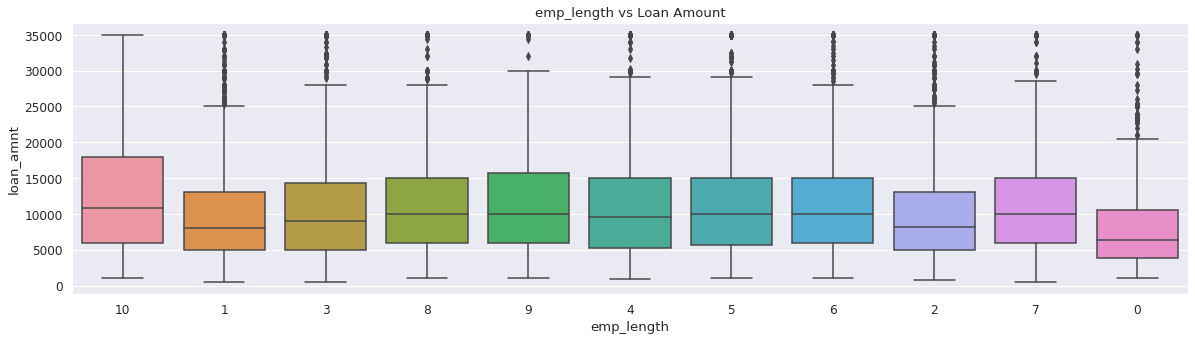

In [398]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

**Observations**:  
more borrowers are from 10+ years and least is <1 year

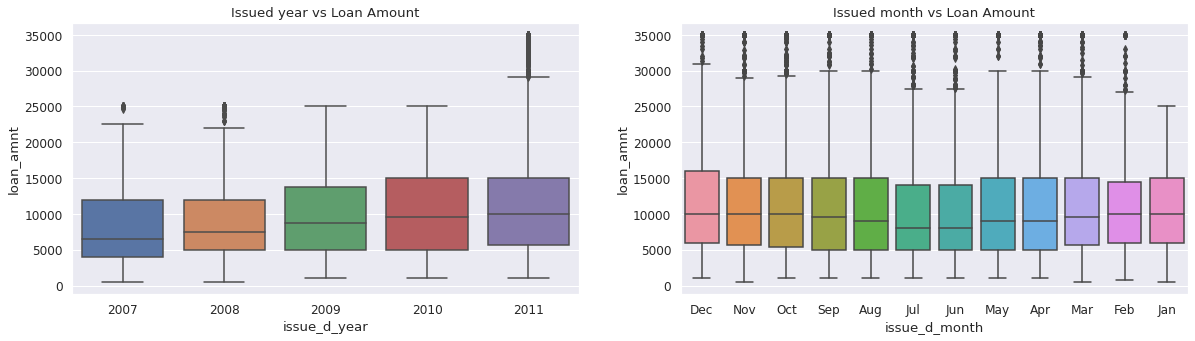

In [399]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations**:<br>
* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.  
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

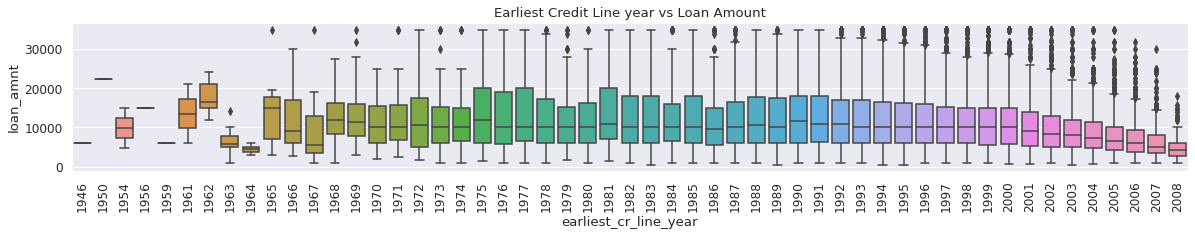

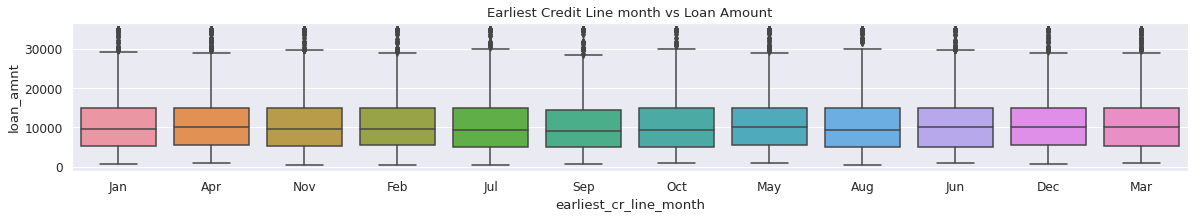

In [400]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

**Observations**:<br>
Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

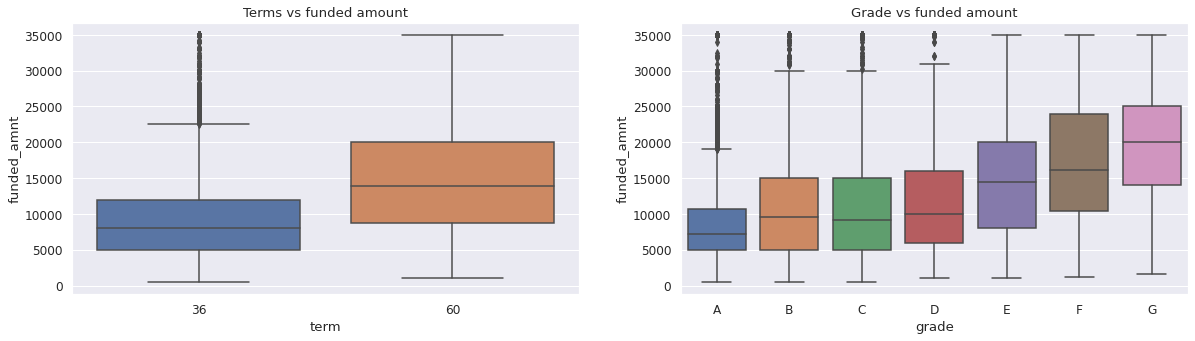

In [401]:
#funded_amnt
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

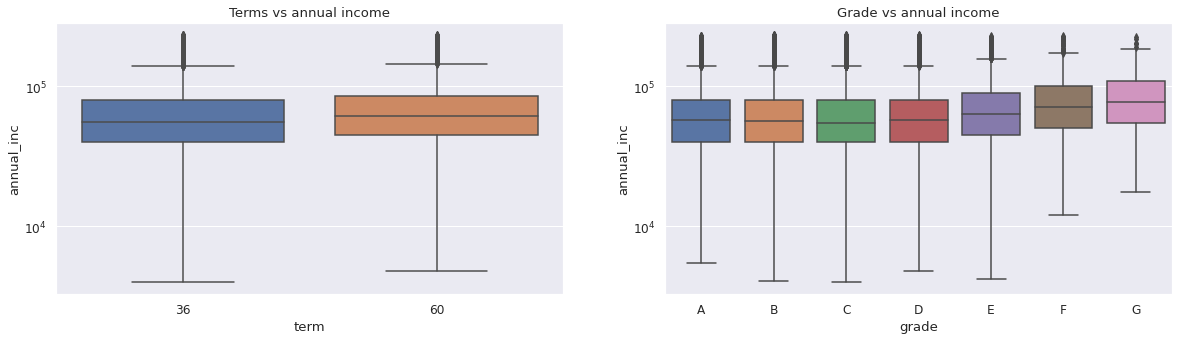

In [402]:
# annual_inc
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

**Observations:**  
Comparatively Annual income is higher for lower grades.

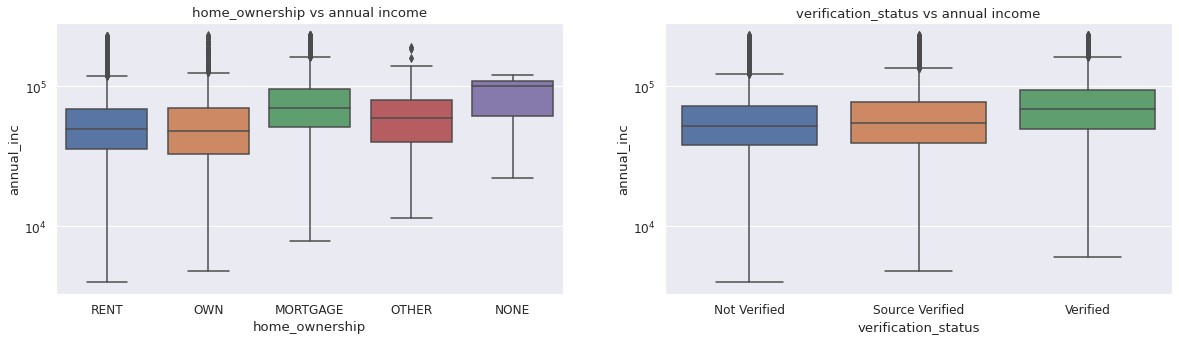

In [403]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

**Observations:**  
The home ownership status for MORTAGE has higher income.  
The income source was verfied for most of the borrower's who had higher annual incomes.

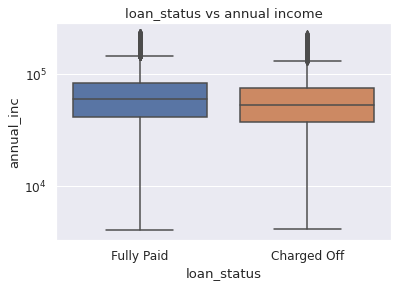

In [404]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.  

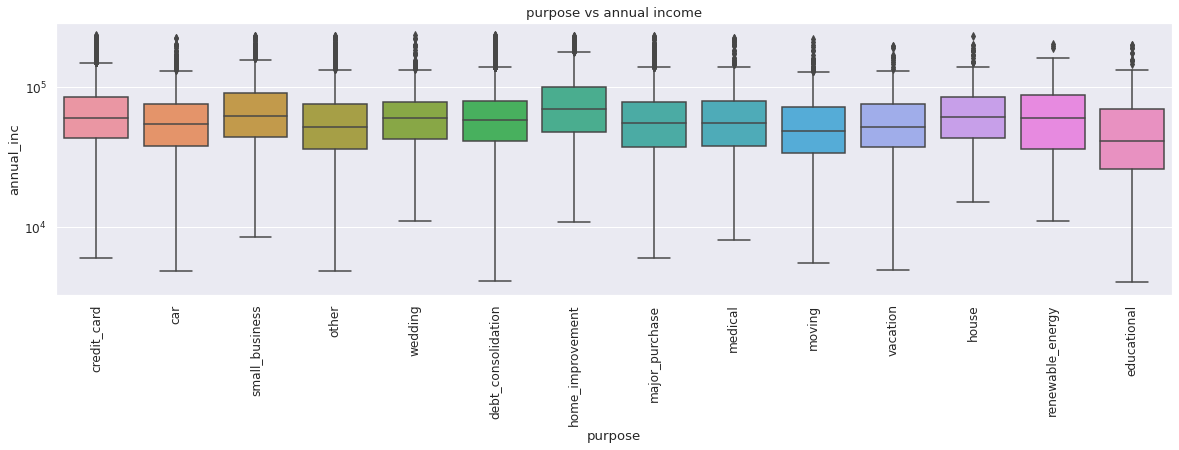

In [405]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

**Observations:**  
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request. 

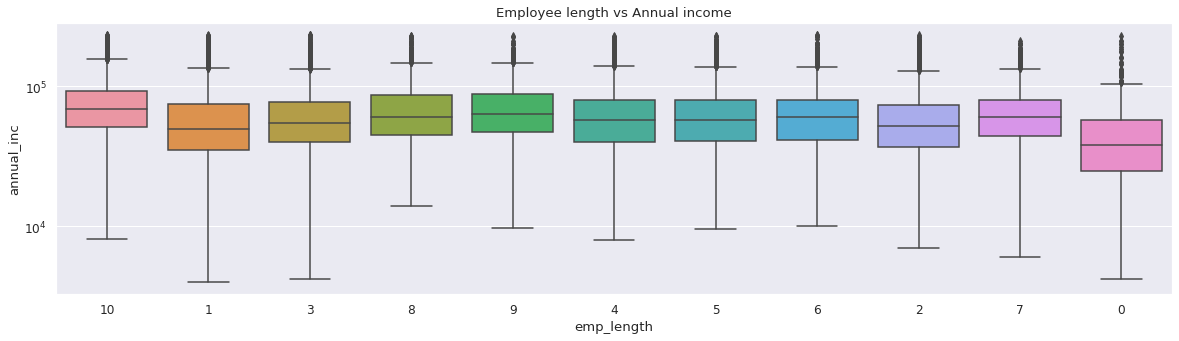

In [406]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**Observations:**  
The borrower's who has higer income have taken loans for 10+ years of duration.

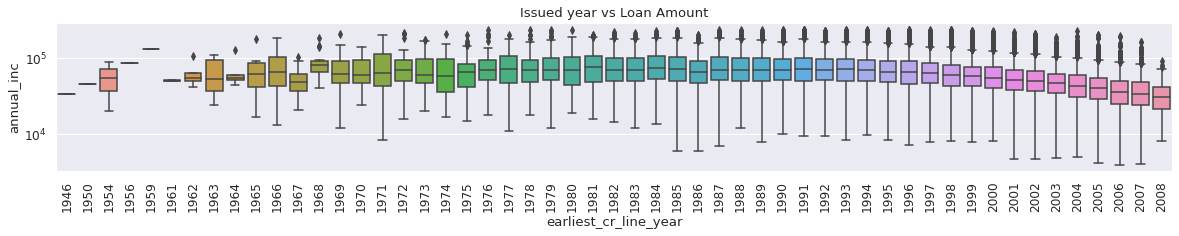

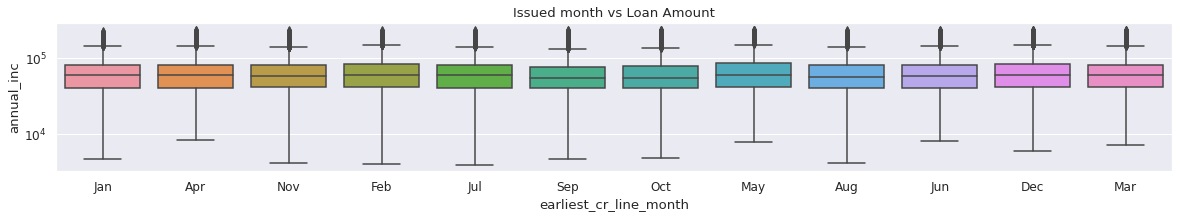

In [407]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

**Observations:**   
No connection with analysis

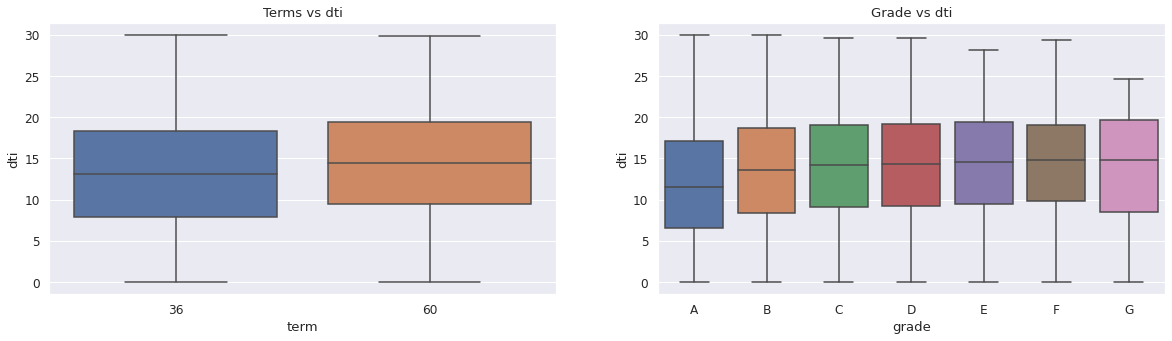

In [408]:
#DTI
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

**Observation**:   
DTI is bit high for people who got more tenure i.e., 60 months.  
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

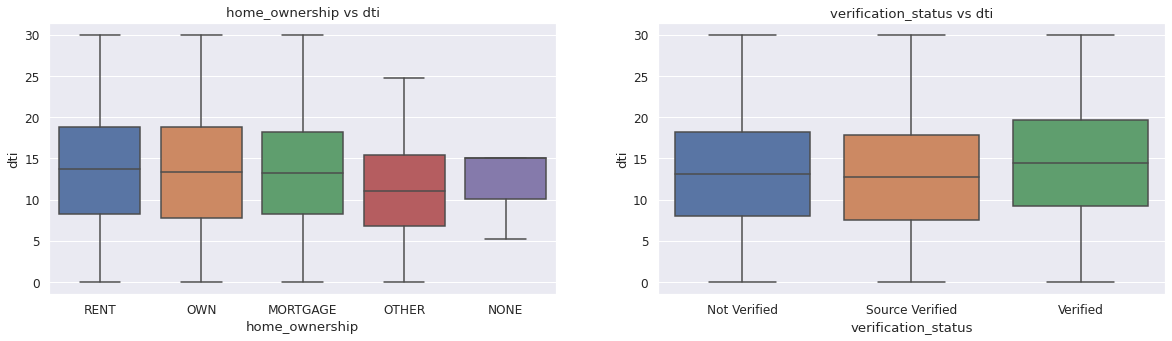

In [409]:
#home ownership
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan_status vs dti')

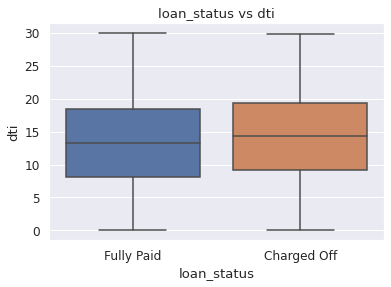

In [410]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

**Observations**  
Borrowers with high DTI has bit more probability to default

# pub_rec
Number of derogatory public records

In [411]:
#Finding proportation of values in each value of category
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,term,id,proportion
0,0,36,27310,0.755882
1,0,60,8820,0.244118
2,1,36,1463,0.729676
3,1,60,542,0.270324
4,2,36,37,0.787234
5,2,60,10,0.212766
6,3,36,7,1.000000
7,4,36,2,1.000000


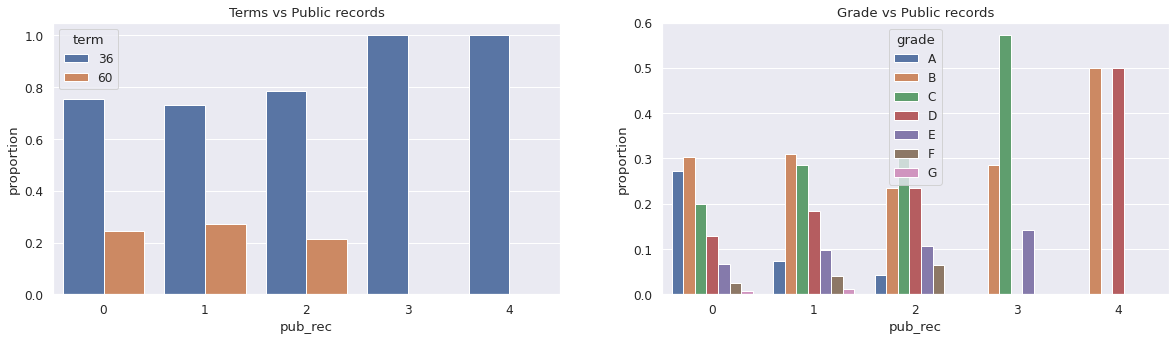

In [412]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

**Observations**:  
* Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.  
* We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.  
* Exceptionally C,D,E graded people are having high pub_recs.

Text(0.5, 0.98, 'loan status vs Public records')

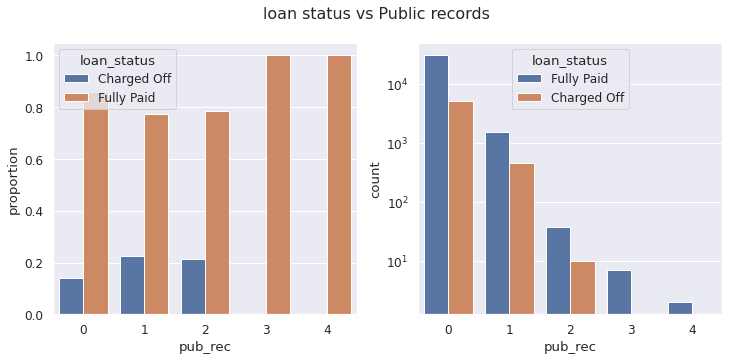

In [413]:
#Proportion of values for each category
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

**Observations**:  
The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

##correlation Matix

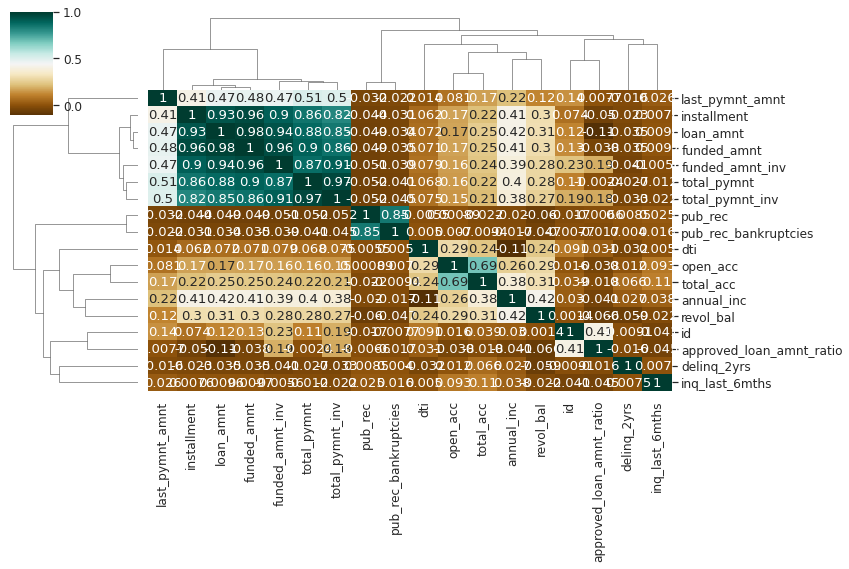

In [414]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables


data_correlation = data.corr()
sns.set(font_scale=1.1)
sns.clustermap(data_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()


###observation:
1. Loan amount, investor amount, funding amount are strongly correlated.
2.+ve correlation between annual income and employment years
3.-ve correlation between annual income with DTI(Debt-to-income ratio) .

# Bivariate Analysis
lets try to analyze the loan status against some important columns which might have played # important role in charged off of loans.

### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

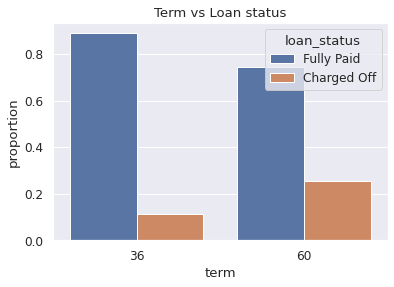

In [415]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

**Observations**:  
Looks like there  are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

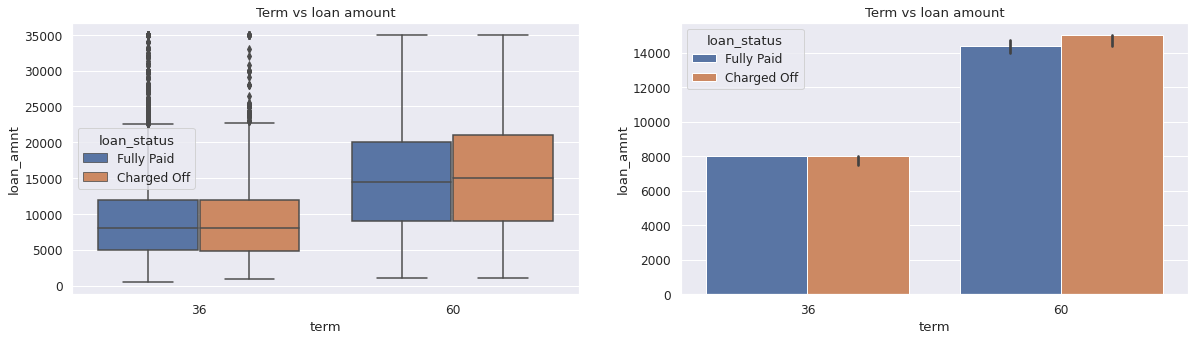

In [416]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
Loan amount is not a decider for defaults in both 36 adn 60 months.   
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

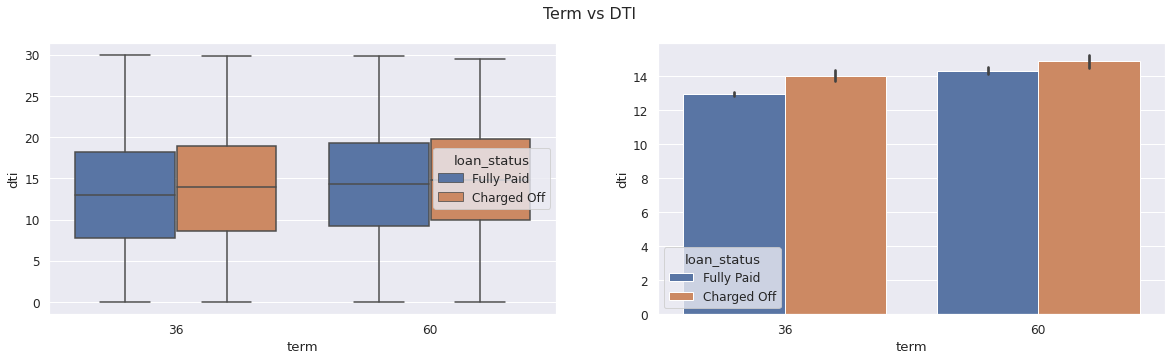

In [417]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**  
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

In [418]:
### Grade
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

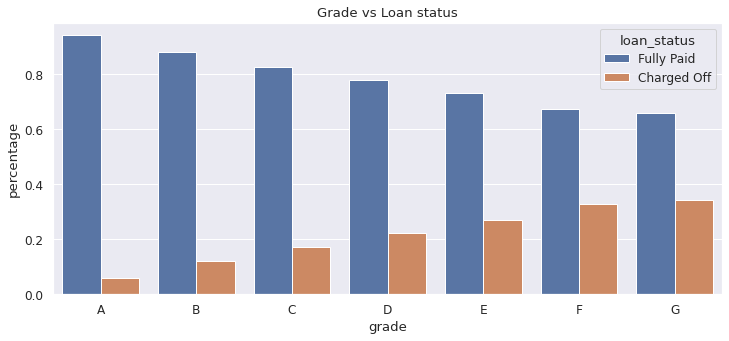

In [419]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

**Observations:**  
The above graph clearly says the Charged off increases as grades decreases.

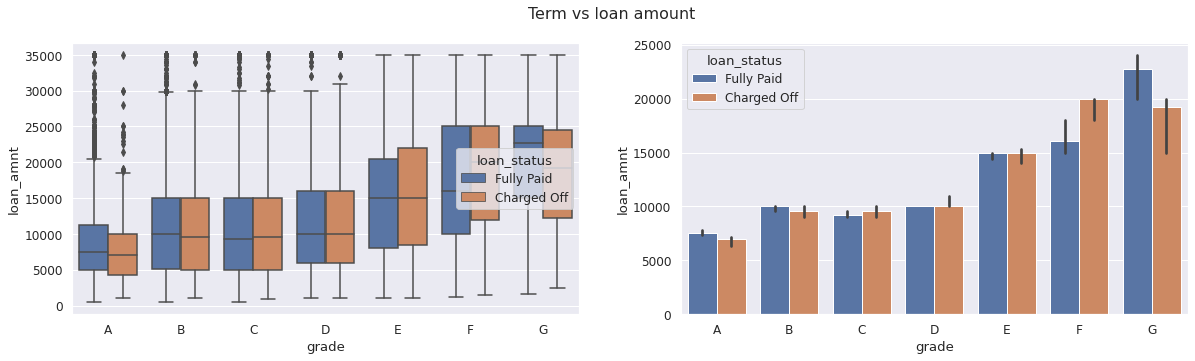

In [420]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**  
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

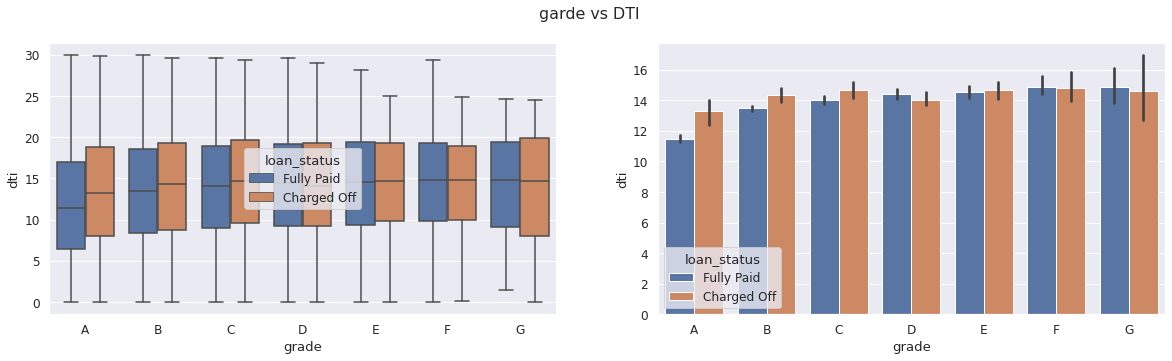

In [421]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**  
There is not much change in dti in each grade and loan status.

Text(0.5, 1.0, 'Grade vs Loan status')

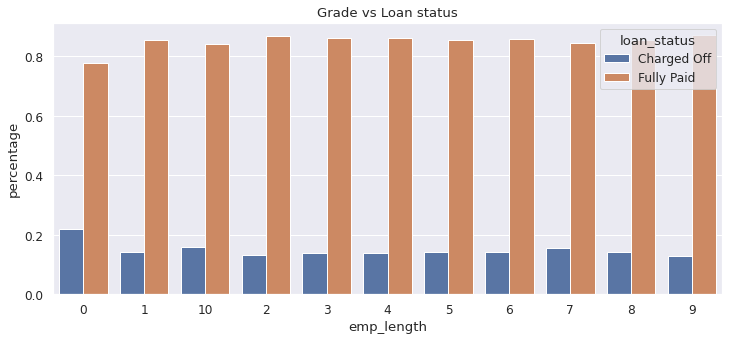

In [422]:
### Employment Length
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

**Observations:**
There is not big changes or pattern observed defaulters across employment lengths.

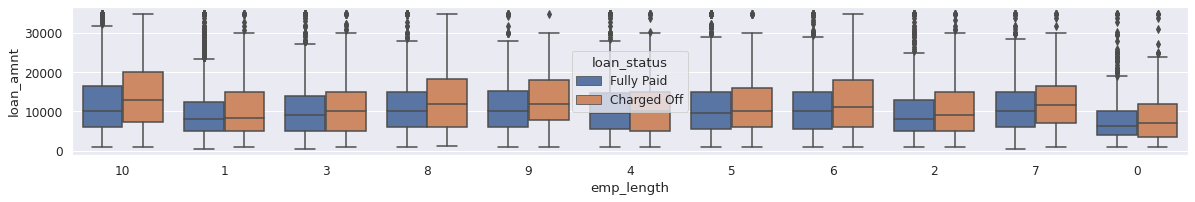

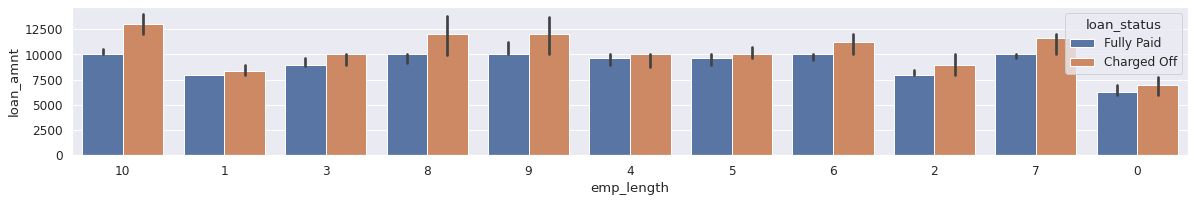

In [423]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

**Observations:**  
Borrowers with higher employment lengths and took more loan amounts got more default rate.

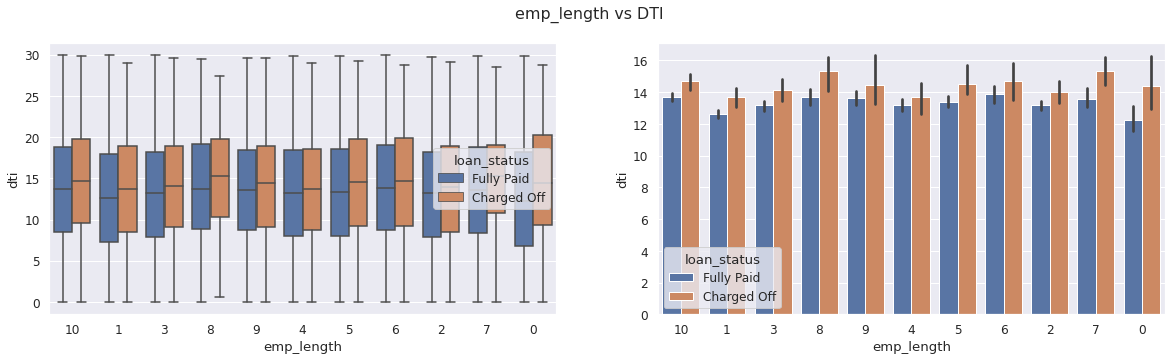

In [424]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**  
Employment Length and DTI are not showing any patterns towards defaults.

Text(0.5, 1.0, 'Home Ownership vs Loan status')

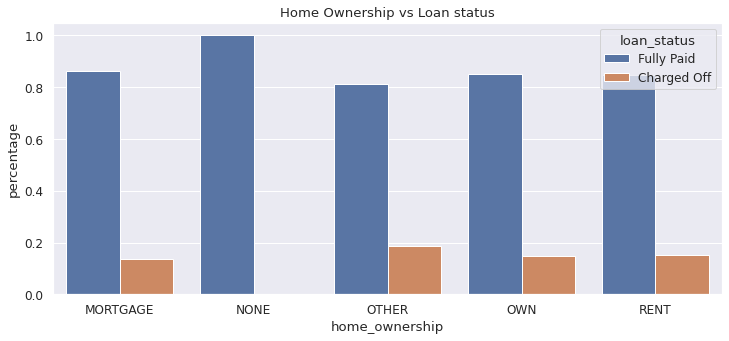

In [425]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

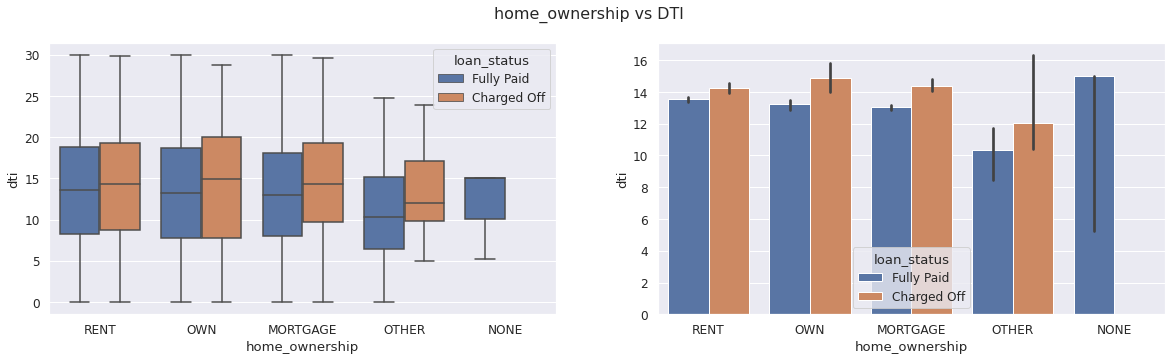

In [426]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

**Observations:**  
* Borrowers in _other_ home ownership category has less dti than other categories.  
* There is equal posibility of home owners defaulting for all the home ownerships.

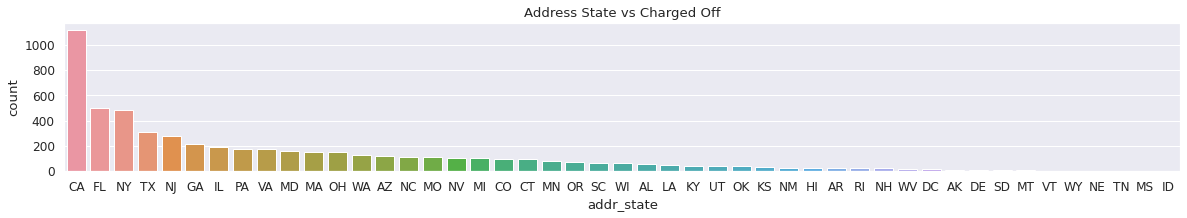

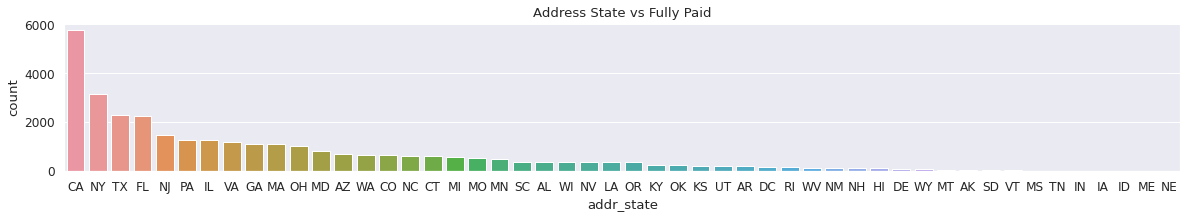

In [427]:
# addr_state
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

**Observations**:   
More number of borrowers defaulted in _CA_ , _FL_ and _NY_ states.

Text(0.5, 1.0, 'Grade vs Loan status')

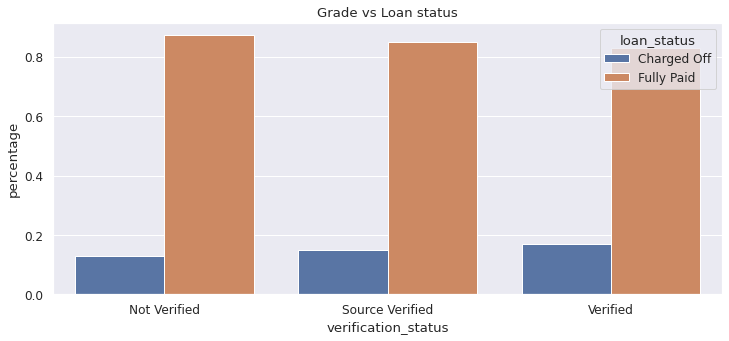

In [428]:
#verification_status
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

**Observations:**  
There isn't big change in charged of loans for all varification status.

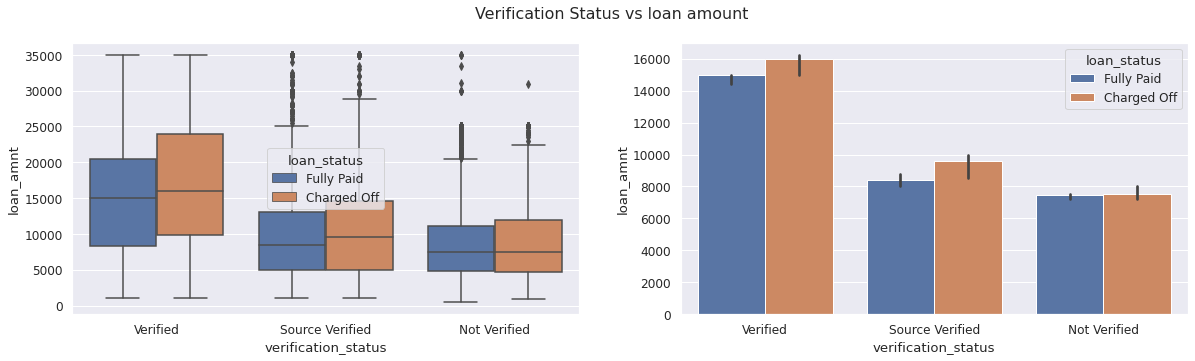

In [429]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations:**  
* Verified loans are given more loan amounts compared to others.
* There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

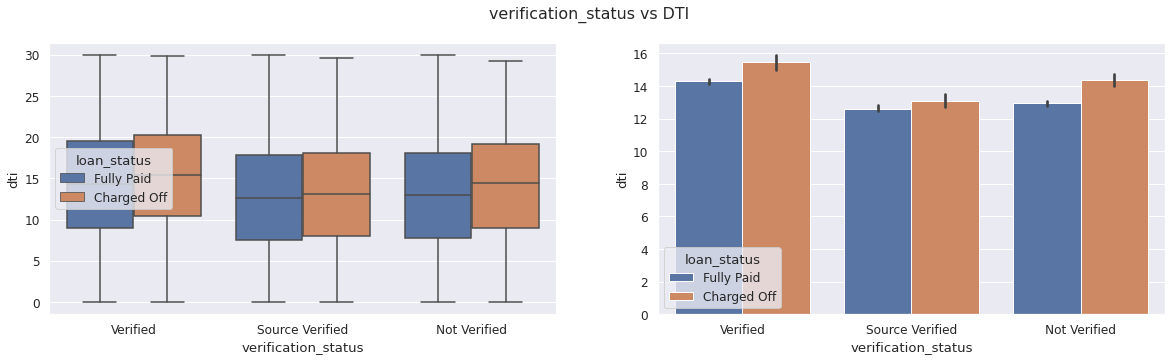

In [430]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

**Observations:**  
There is slight increase in the dti mean for defaulted laons for all the verification status categories.

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

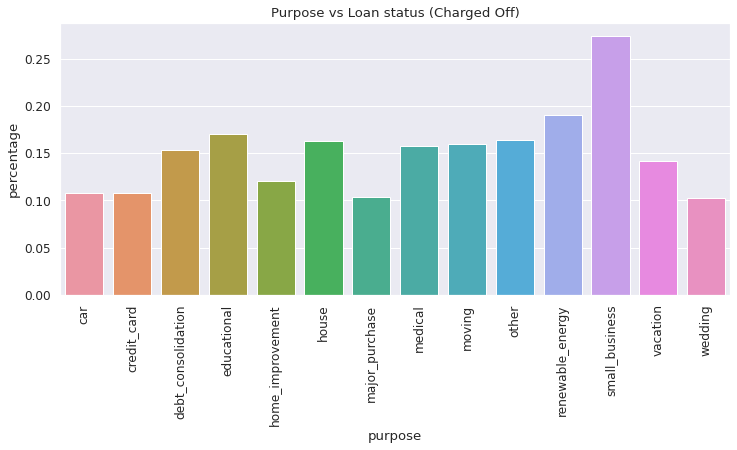

In [431]:
#purpose
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

**Observations:**  
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

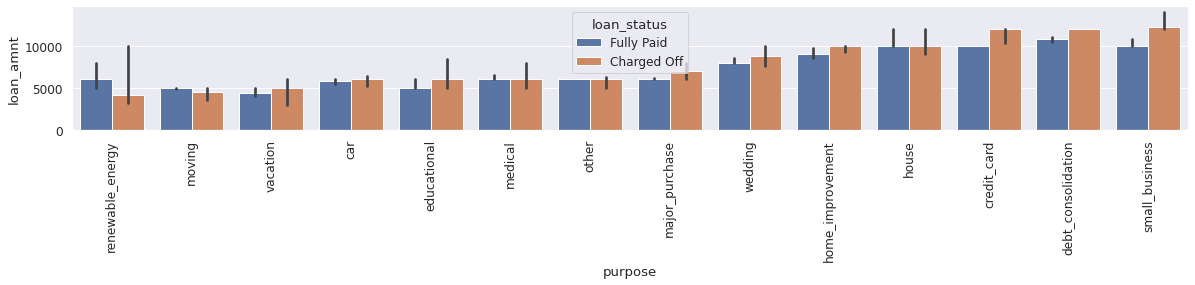

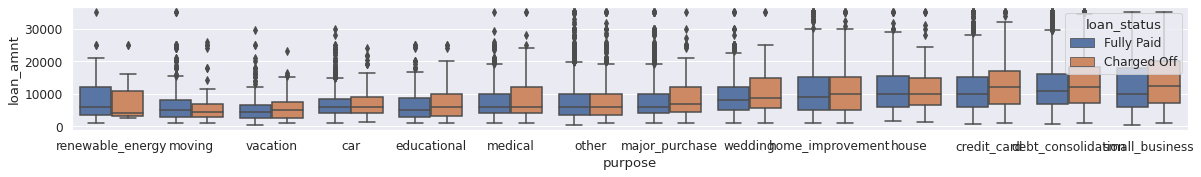

In [432]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()


**Observations:**  
Small Business has more defaults when the loan amount is also high.

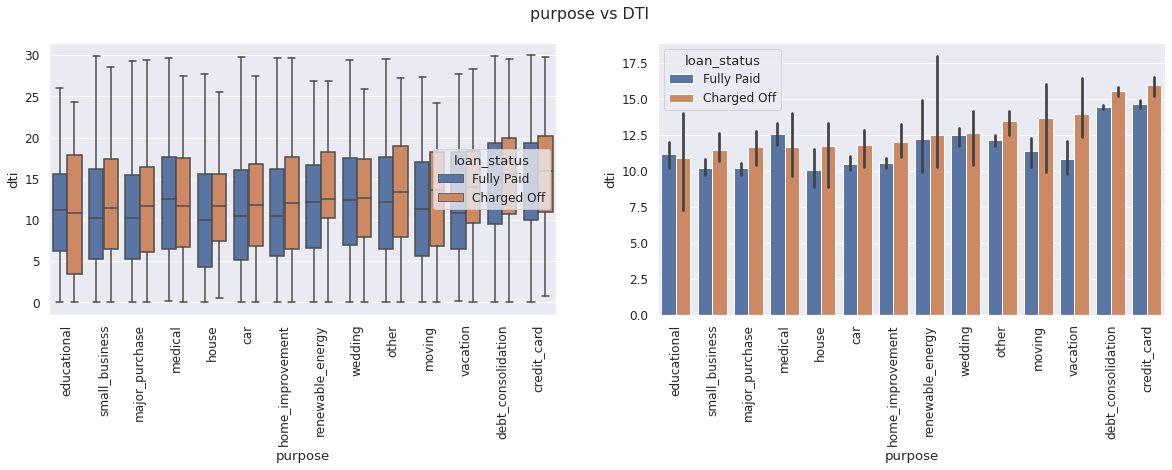

In [433]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
Could not observe any pattern from the charts

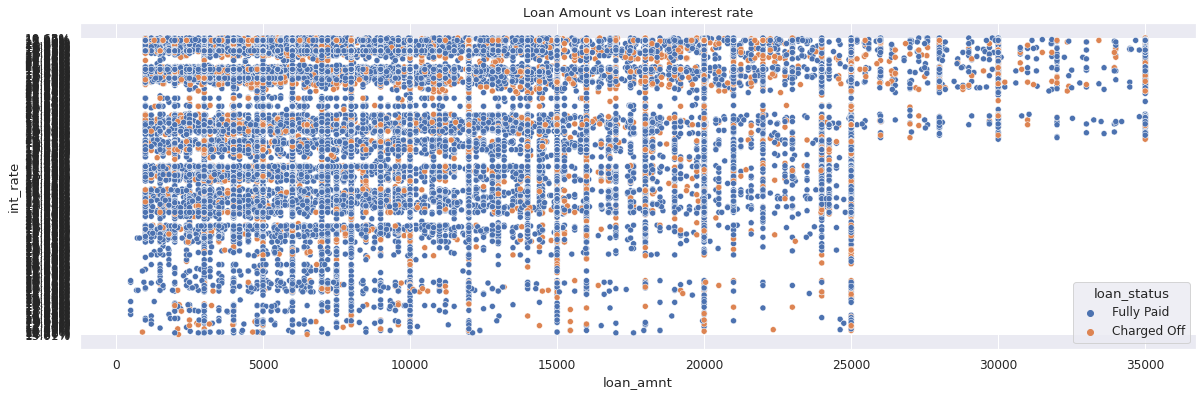

In [434]:
#Loan amount Vs Int_rate
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observartions**:  
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

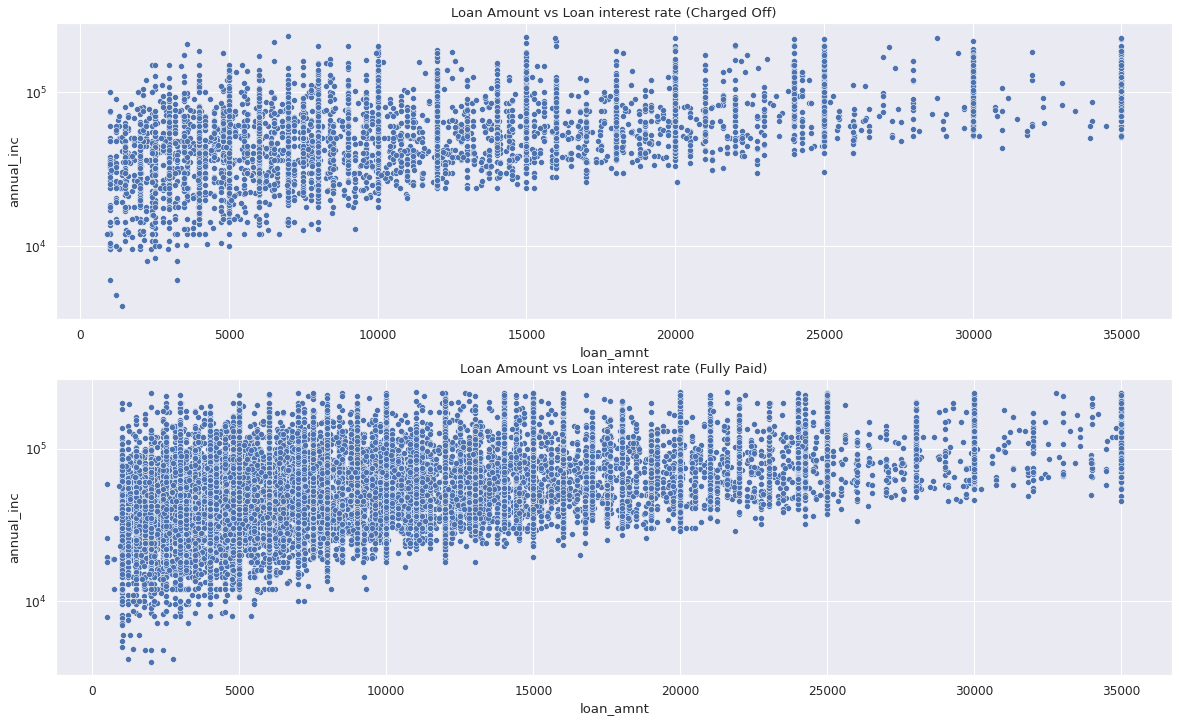

In [435]:
#### Loan Amount vs Annual income
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

###observation:
Result shows no uses